In [ ]:
# Check GPU Availability
!nvidia-smi

# Install YOLOv11 (Ultralytics)
!pip install ultralytics albumentations tqdm matplotlib seaborn


Sun Mar 23 14:34:59 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   52C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os as os

# Define dataset paths
base_path = "/content/drive/MyDrive/Datasets/Traffic_sign"
train_path = f"{base_path}/train/images"
val_path = f"{base_path}/valid/images"
test_path = f"{base_path}/test/images"
yaml_path = f"{base_path}/data.yaml"

# Define resized dataset paths
resized_base_path = "/content/drive/MyDrive/Datasets/Traffic_sign_resized"
train_resized_path = f"{resized_base_path}/train"
val_resized_path = f"{resized_base_path}/valid"
test_resized_path = f"{resized_base_path}/test"

# Create folders for resized dataset
for folder in [train_resized_path, val_resized_path, test_resized_path]:
    os.makedirs(f"{folder}/images", exist_ok=True)
    os.makedirs(f"{folder}/labels", exist_ok=True)

print("✅ Folder structure created for resized dataset.")


✅ Folder structure created for resized dataset.


In [ ]:
import cv2
import numpy as np
import albumentations as A
from tqdm import tqdm
from PIL import Image

# Resize to 640x640
img_size = 640

# Define augmentation transformations
transform = A.Compose([
    A.HorizontalFlip(p=0.5),  # 50% chance of horizontal flip
    A.RandomBrightnessContrast(p=0.3),  # Random brightness/contrast changes
    A.Rotate(limit=15, p=0.5),  # Random rotation up to ±15 degrees
])

# Function to process images
def process_images(input_folder, output_folder, augment=False):
    image_input_folder = os.path.join(base_path, input_folder, "images")
    label_input_folder = os.path.join(base_path, input_folder, "labels")

    image_output_folder = os.path.join(resized_base_path, output_folder, "images")
    label_output_folder = os.path.join(resized_base_path, output_folder, "labels")

    for img_name in tqdm(os.listdir(image_input_folder), desc=f"Processing {input_folder}"):
        img_path = os.path.join(image_input_folder, img_name)
        output_img_path = os.path.join(image_output_folder, img_name)

        try:
            # Open and resize image
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_resized = cv2.resize(img, (img_size, img_size), interpolation=cv2.INTER_LANCZOS4)

            # Apply augmentation only to train set
            if augment:
                augmented = transform(image=img_resized)
                img_resized = augmented["image"]

            # Save image
            img_resized = Image.fromarray(img_resized)
            img_resized.save(output_img_path)

            # Copy label file
            label_name = os.path.splitext(img_name)[0] + ".txt"
            label_path = os.path.join(label_input_folder, label_name)
            output_label_path = os.path.join(label_output_folder, label_name)

            if os.path.exists(label_path):
                os.system(f"cp {label_path} {output_label_path}")

        except Exception as e:
            print(f"❌ Error processing {img_name}: {e}")

# Process all images
process_images("train", "train", augment=True)
process_images("valid", "valid", augment=False)
process_images("test", "test", augment=False)

print("✅ Images resized and augmented successfully!")


Processing test: 100%|██████████| 677/677 [03:43<00:00,  3.03it/s]

✅ Images resized and augmented successfully!


In [ ]:
# Update dataset paths in data.yaml
with open(yaml_path, "r") as file:
    lines = file.readlines()

with open(yaml_path, "w") as file:
    for line in lines:
        if line.startswith("train:"):
            file.write(f"train: {train_resized_path}/images\n")
        elif line.startswith("val:"):
            file.write(f"val: {val_resized_path}/images\n")
        elif line.startswith("test:"):
            file.write(f"test: {test_resized_path}/images\n")
        else:
            file.write(line)

print("✅ Updated data.yaml to use resized dataset.")

✅ Updated data.yaml to use resized dataset.


In [2]:
pip install ultralytics --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
!yolo detect train model=yolo11s.pt \
    data=/content/drive/MyDrive/Datasets/Traffic_sign/data.yaml \
    epochs=70 batch=16 imgsz=640 plots=True save_period=10

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 18.4M/18.4M [00:00<00:00, 128MB/s] 
Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/drive/MyDrive/Datasets/Traffic_sign/data.yaml, epochs=70, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=10, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=

In [ ]:
!cp -v /content/runs/detect/train/weights/best.pt /content/drive/MyDrive/checkpoints/
!cp -v /content/runs/detect/train/weights/last.pt /content/drive/MyDrive/checkpoints/


'/content/runs/detect/train/weights/best.pt' -> '/content/drive/MyDrive/checkpoints/best.pt'
'/content/runs/detect/train/weights/last.pt' -> '/content/drive/MyDrive/checkpoints/last.pt'


In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ultralytics import YOLO
import os
import shutil

# Load the trained model
model_path = "/content/runs/detect/train/weights/best.pt"  # Adjust path if needed
yolo_model = YOLO(model_path)

In [ ]:
metrics = yolo_model.val()

# Extract values correctly based on latest Ultralytics YOLO version
precision = metrics.results_dict["metrics/precision(B)"]  # Precision
recall = metrics.results_dict["metrics/recall(B)"]  # Recall
mAP50 = metrics.results_dict["metrics/mAP50(B)"]  # mAP@50
mAP50_95 = metrics.results_dict["metrics/mAP50-95(B)"]  # mAP@50-95

# Estimate Overall Accuracy
accuracy = (precision + recall) / 2

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"mAP@50: {mAP50:.4f}")
print(f"mAP@50-95: {mAP50_95:.4f}")
print(f"Overall Accuracy: {accuracy:.4f}")

Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/drive/MyDrive/Datasets/Traffic_sign_resized/valid/labels.cache... 1383 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1383/1383 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 87/87 [00:38<00:00,  2.25it/s]


                   all       1383       1388      0.895      0.897      0.937      0.885
ALL_MOTOR_VEHICLE_PROHIBITED          6          6      0.943          1      0.995       0.88
       AXLE_LOAD_LIMIT          9          9      0.951          1      0.995      0.995
         BARRIER_AHEAD          3          3      0.866          1      0.995      0.942
BULLOCK_AND_HANDCART_PROHIBITED          6          6      0.916          1      0.995      0.995
    BULLOCK_PROHIBITED          3          3      0.851          1      0.995      0.963
                CATTLE         15         15          1      0.918      0.995      0.947
      COMPULSARY_AHEAD         11         11          1      0.998      0.995      0.875
COMPULSARY_AHEAD_OR_TURN_LEFT          8          8      0.589      0.625      0.718      0.718
COMPULSARY_AHEAD_OR_TURN_RIGHT         14         14      0.791      0.786      0.862      0.815
COMPULSARY_CYCLE_TRACK          4          4      0.887          1      0.995   

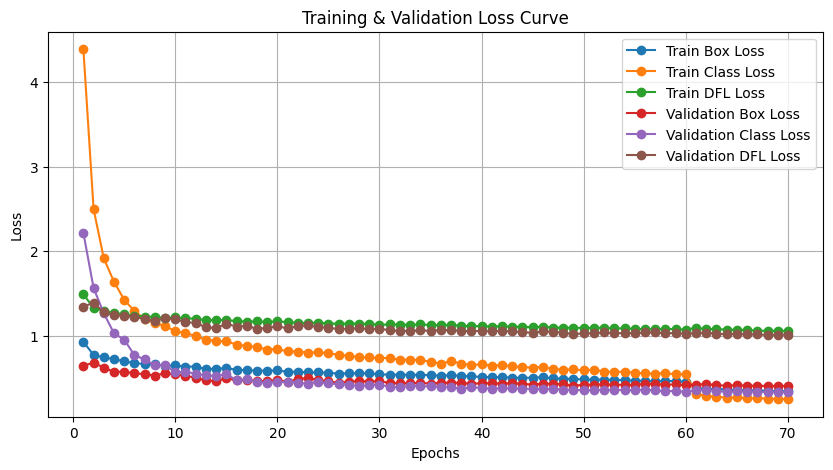

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Path to training log file
log_path = "/content/runs/detect/train/results.csv"  # Update path if needed

# Load data
data = np.genfromtxt(log_path, delimiter=",", names=True, dtype=None, encoding=None)

# Plot Training & Validation Loss
plt.figure(figsize=(10, 5))

# Plot different losses (Box, Classification, DFL)
plt.plot(data["epoch"], data["trainbox_loss"], label="Train Box Loss", marker="o")
plt.plot(data["epoch"], data["traincls_loss"], label="Train Class Loss", marker="o")
plt.plot(data["epoch"], data["traindfl_loss"], label="Train DFL Loss", marker="o")

plt.plot(data["epoch"], data["valbox_loss"], label="Validation Box Loss", marker="o")
plt.plot(data["epoch"], data["valcls_loss"], label="Validation Class Loss", marker="o")
plt.plot(data["epoch"], data["valdfl_loss"], label="Validation DFL Loss", marker="o")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss Curve")
plt.legend()
plt.grid()
plt.show()


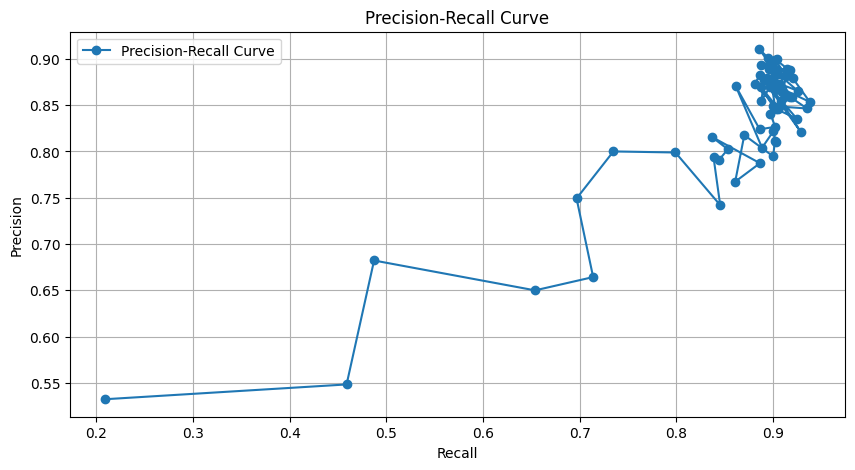

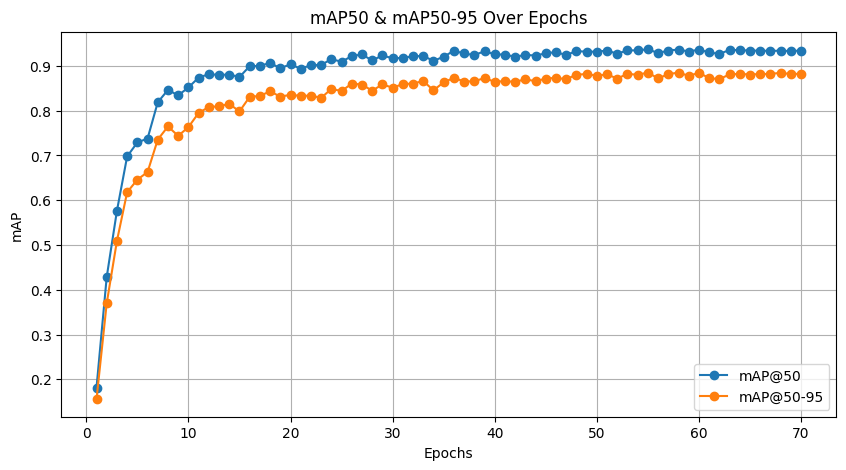

In [ ]:
# Extract Metrics
epochs = data["epoch"]
precision = data["metricsprecisionB"]
recall = data["metricsrecallB"]
mAP50 = data["metricsmAP50B"]
mAP5095 = data["metricsmAP5095B"]

# 📌 Plot Precision-Recall Curve
plt.figure(figsize=(10, 5))
plt.plot(recall, precision, marker="o", label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()

# 📌 Plot mAP Curve
plt.figure(figsize=(10, 5))
plt.plot(epochs, mAP50, marker="o", label="mAP@50")
plt.plot(epochs, mAP5095, marker="o", label="mAP@50-95")
plt.xlabel("Epochs")
plt.ylabel("mAP")
plt.title("mAP50 & mAP50-95 Over Epochs")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Extracting correct metric values
precision = metrics.results_dict["metrics/precision(B)"]
recall = metrics.results_dict["metrics/recall(B)"]
mAP50 = metrics.results_dict["metrics/mAP50(B)"]
mAP50_95 = metrics.results_dict["metrics/mAP50-95(B)"]

# Overall Accuracy (Not directly available, so we take mAP50 as a close indicator)
accuracy = mAP50

# Print extracted metrics
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ mAP@50: {mAP50:.4f}")
print(f"✅ mAP@50-95: {mAP50_95:.4f}")
print(f"✅ Overall Accuracy (approx): {accuracy:.4f}")

# Save results to a text file
with open("evaluation_results.txt", "w") as f:
    f.write(f"Precision: {precision:.4f}\n")
    f.write(f"Recall: {recall:.4f}\n")
    f.write(f"mAP@50: {mAP50:.4f}\n")
    f.write(f"mAP@50-95: {mAP50_95:.4f}\n")
    f.write(f"Overall Accuracy: {accuracy:.4f}\n")

print("✅ Evaluation results saved to 'evaluation_results.txt'")


✅ Precision: 0.8947
✅ Recall: 0.8969
✅ mAP@50: 0.9372
✅ mAP@50-95: 0.8846
✅ Overall Accuracy (approx): 0.9372
✅ Evaluation results saved to 'evaluation_results.txt'


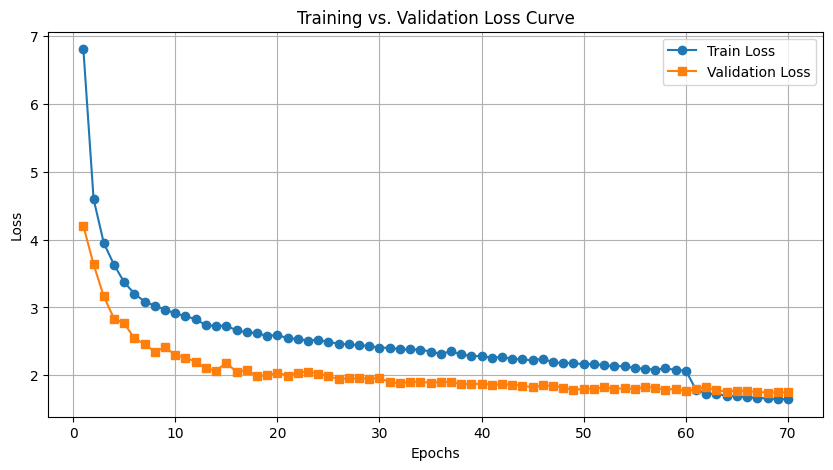

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Path to training log file
log_path = "runs/detect/train/results.csv"

# Load the log data
data = np.genfromtxt(log_path, delimiter=",", names=True)

# Extract relevant loss values
epochs = data["epoch"]
train_loss = data["trainbox_loss"] + data["traincls_loss"] + data["traindfl_loss"]
val_loss = data["valbox_loss"] + data["valcls_loss"] + data["valdfl_loss"]

# Plot Loss Curves
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, label="Train Loss", marker="o")
plt.plot(epochs, val_loss, label="Validation Loss", marker="s")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs. Validation Loss Curve")
plt.legend()
plt.grid()
plt.show()


In [3]:
!yolo detect predict model=/content/drive/MyDrive/Traffic_Sign_YOLOv11/checkpoints/best.pt \
  source=/content/drive/MyDrive/Traffic_Sign_YOLOv11/Resized_Images/test/images \
  save=True

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11s summary (fused): 100 layers, 9,445,695 parameters, 0 gradients, 21.5 GFLOPs

image 1/677 /content/drive/MyDrive/Traffic_Sign_YOLOv11/Resized_Images/test/images/00001_jpg.rf.1bf3bbca62938770f4a569a4b31baf7d.jpg: 640x640 1 ALL_MOTOR_VEHICLE_PROHIBITED, 575.3ms
image 2/677 /content/drive/MyDrive/Traffic_Sign_YOLOv11/Resized_Images/test/images/00004_jpg.rf.82d5d926fc2014b325570bfcfb013bee.jpg: 640x640 1 ALL_MOTOR_VEHICLE_PROHIBITED, 537.4ms
image 3/677 /content/drive/MyDrive/Traffic_Sign_YOLOv11/Resized_Images/test/images/00006_jpg.rf.81243e07eb603dc9e9190c2bc758c58f.jpg: 640x640 1 ALL_MOTOR_VEHICLE